# TIME SERIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,6

In [4]:
df = pd.read_csv("AirPassengers.csv")

In [5]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


#### Parse string to datetime type

In [6]:
df["Month"] = pd.to_datetime(df["Month"], infer_datetime_format = True)
idf = df.set_index(["Month"])

In [7]:
from datetime import datetime

In [9]:
idf

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


#### Plot graph

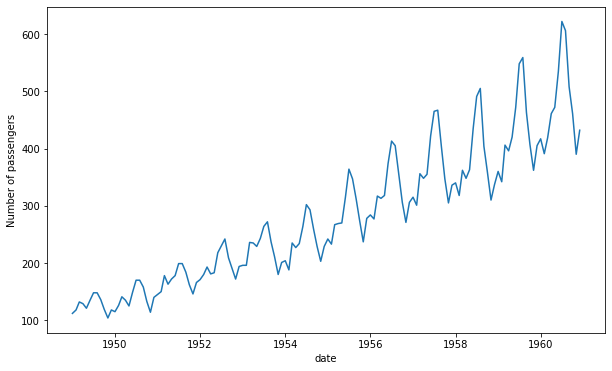

In [13]:
plt.plot(idf)
plt.xlabel("date")
plt.ylabel("Number of passengers")
plt.show()

#### Determine rolling Statistics

In [14]:
rolmean = idf.rolling(window = 12).mean()
rolstd = idf.rolling(window = 12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


#### Plot rolling Statistics

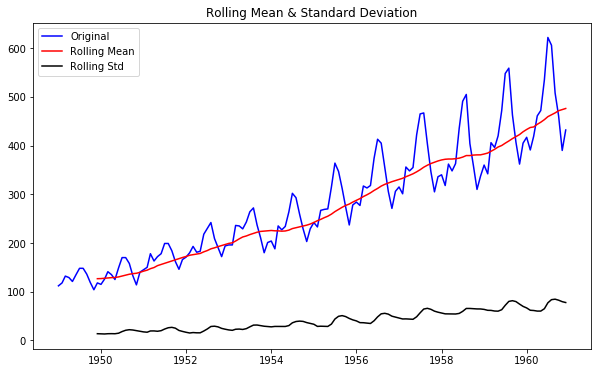

In [91]:
plt.title("Rolling Mean & Standard Deviation")
original = plt.plot(idf, color = "blue", label = "Original")
mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
std = plt.plot(rolstd, color = "black", label = "Rolling Std")
plt.legend(loc="best")
plt.show()

## Dickey-Fuller Test

In [18]:
from statsmodels.tsa.stattools import adfuller

In [22]:
print("Result of Dickey-fuller Test:")
test = adfuller(idf["#Passengers"], autolag = 'AIC')
output = pd.Series(test[0:4], index = ["Test Statistics","p-value","#Lags Used", "Number of observation used"])
for key,value in test[4].items():
    output["Critical Value (%s)"%key] = value
    
print(output)

Result of Dickey-fuller Test:
Test Statistics                 0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of observation used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


#### Estimating Trend

In [23]:
idf_logscale = np.log(idf)

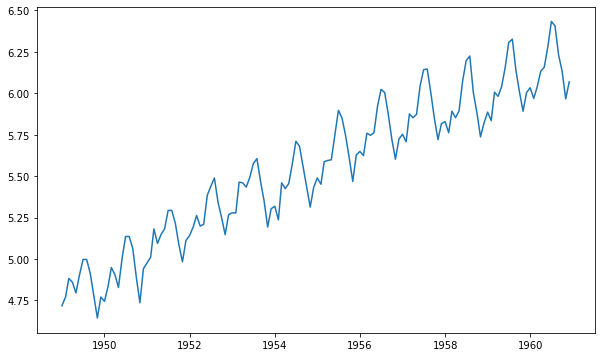

In [25]:
plt.plot(idf_logscale)
plt.show()

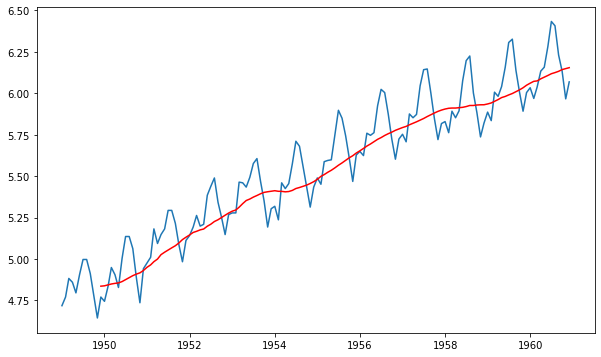

In [26]:
moving_avg = idf_logscale.rolling(window = 12).mean()
moving_std = idf_logscale.rolling(window = 12).std()
plt.plot(idf_logscale)
plt.plot(moving_avg, color = "red")
plt.show()

In [27]:
final = idf_logscale - moving_avg

In [29]:
final.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [30]:
final.dropna(inplace = True)

In [31]:
final.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


#### To determining Rolling Statistics

In [34]:
def test_stationarity(timeseries):
    moving_avg = timeseries.rolling(window = 12).mean()
    moving_std = timeseries.rolling(window = 12).std()
    
    # plot rolling statistics
    plt.title("Rolling Mean & Standard Deviation")
    original = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(moving_avg, color = "red", label = "Rolling Mean")
    std = plt.plot(moving_std, color = "black", label = "Rolling Std")
    plt.legend(loc="best")
    plt.show()
    
    # perform Dickey-Fuller test
    print("Result of Dickey-fuller Test:")
    test = adfuller(timeseries["#Passengers"], autolag = 'AIC')
    output = pd.Series(test[0:4], index = ["Test Statistics","p-value","#Lags Used", "Number of observation used"])
    for key,value in test[4].items():
        output["Critical Value (%s)"%key] = value
    
    print(output)

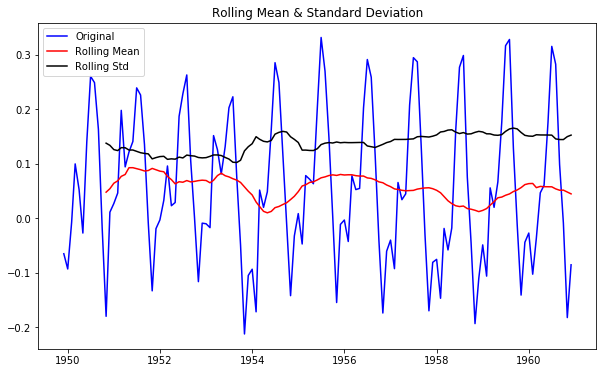

Result of Dickey-fuller Test:
Test Statistics                -3.162908
p-value                         0.022235
#Lags Used                     13.000000
Number of observation used    119.000000
Critical Value (1%)            -3.486535
Critical Value (5%)            -2.886151
Critical Value (10%)           -2.579896
dtype: float64


In [35]:
test_stationarity(final)

#### To find Exponential Decay Weighted average

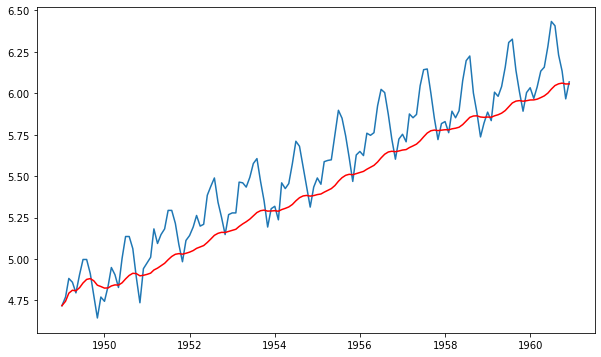

In [36]:
edwa = idf_logscale.ewm(halflife=12, min_periods = 0, adjust = True).mean()
plt.plot(idf_logscale)
plt.plot(edwa, color = "red")
plt.show()

#### Dataset log scale minus moving exponential Decay averge

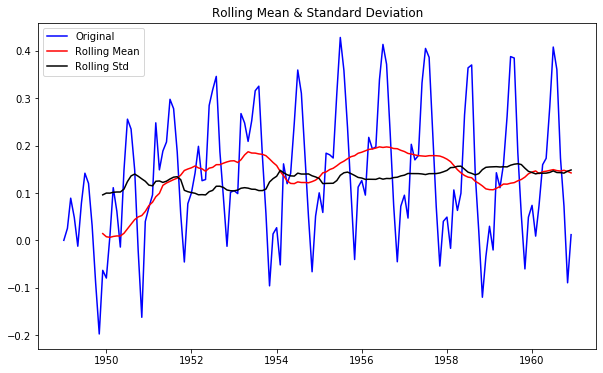

Result of Dickey-fuller Test:
Test Statistics                -3.601262
p-value                         0.005737
#Lags Used                     13.000000
Number of observation used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


In [37]:
dlogmea = idf_logscale - edwa
test_stationarity(dlogmea)

#### Dataset Log Differntial Shifting

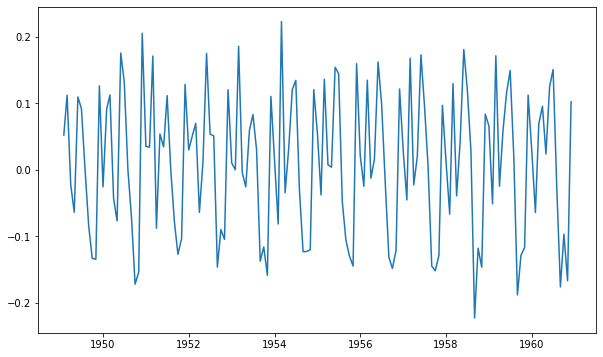

In [38]:
dlogds = idf_logscale - idf_logscale.shift()
plt.plot(dlogds)
plt.show()

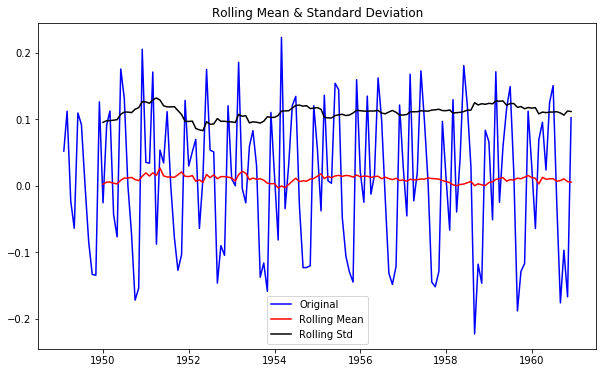

Result of Dickey-fuller Test:
Test Statistics                -2.717131
p-value                         0.071121
#Lags Used                     14.000000
Number of observation used    128.000000
Critical Value (1%)            -3.482501
Critical Value (5%)            -2.884398
Critical Value (10%)           -2.578960
dtype: float64


In [39]:
dlogds.dropna(inplace = True)
test_stationarity(dlogds)

### To See all the plots in one layout

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd

In [42]:
decom = sd(idf_logscale)

In [43]:
# their are 3 types Trend, sesonal, residual 

In [44]:
trend = decom.trend
seasonal = decom.seasonal
residual = decom.resid

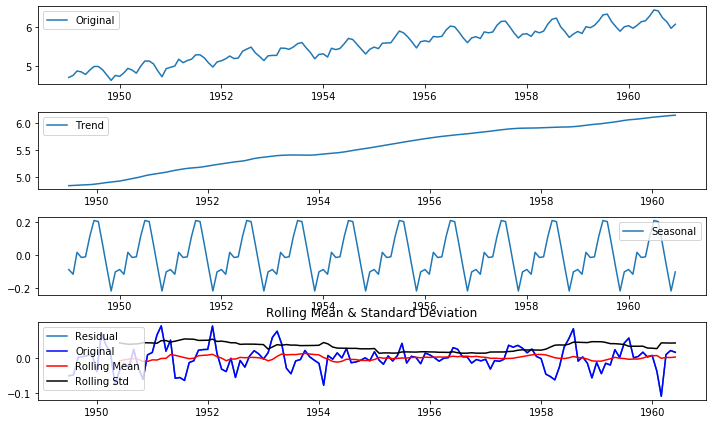

Result of Dickey-fuller Test:
Test Statistics              -6.332387e+00
p-value                       2.885059e-08
#Lags Used                    9.000000e+00
Number of observation used    1.220000e+02
Critical Value (1%)          -3.485122e+00
Critical Value (5%)          -2.885538e+00
Critical Value (10%)         -2.579569e+00
dtype: float64


In [47]:
plt.subplot(411)
plt.plot(idf_logscale, label = "Original")
plt.legend(loc = "best")
plt.subplot(412)
plt.plot(trend, label = "Trend")
plt.legend(loc = "best")
plt.subplot(413)
plt.plot(seasonal, label = "Seasonal")
plt.legend(loc = "best")
plt.subplot(414)
plt.plot(residual, label = "Residual")
plt.legend(loc = "best")
plt.tight_layout()

decomposedLogdata = residual
decomposedLogdata.dropna(inplace = True)
test_stationarity(decomposedLogdata)

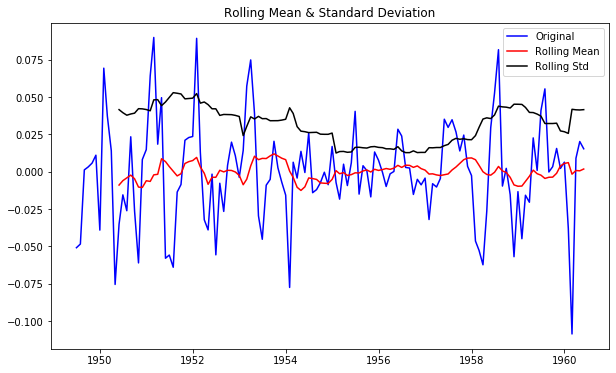

Result of Dickey-fuller Test:
Test Statistics              -6.332387e+00
p-value                       2.885059e-08
#Lags Used                    9.000000e+00
Number of observation used    1.220000e+02
Critical Value (1%)          -3.485122e+00
Critical Value (5%)          -2.885538e+00
Critical Value (10%)         -2.579569e+00
dtype: float64


In [48]:
decomposedLogdata = residual
decomposedLogdata.dropna(inplace = True)
test_stationarity(decomposedLogdata)

#### ACF & PACF Plots

In [49]:
from statsmodels.tsa.stattools import acf, pacf

In [51]:
lag_acf = acf(dlogds, nlags = 20)
lag_pacf = pacf(dlogds, nlags = 20, method = 'ols')

In [52]:
# ols = ordinary list square methode

#### Plot ACF

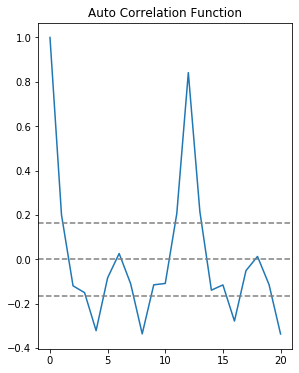

In [58]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle="--", color = "gray")
plt.axhline(y=-1.96/np.sqrt(len(dlogds)),linestyle="--", color = "gray")
plt.axhline(y=1.96/np.sqrt(len(dlogds)),linestyle="--", color = "gray")
plt.title("Auto Correlation Function")
plt.show()

#### Plot PACF

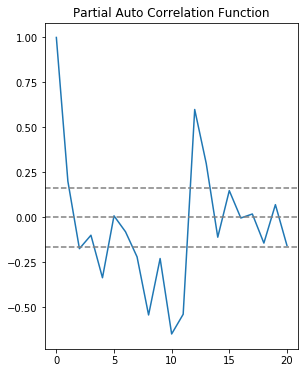

<Figure size 720x432 with 0 Axes>

In [60]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle="--", color = "gray")
plt.axhline(y=-1.96/np.sqrt(len(dlogds)),linestyle="--", color = "gray")
plt.axhline(y=1.96/np.sqrt(len(dlogds)),linestyle="--", color = "gray")
plt.title("Partial Auto Correlation Function")
plt.show()
plt.tight_layout()

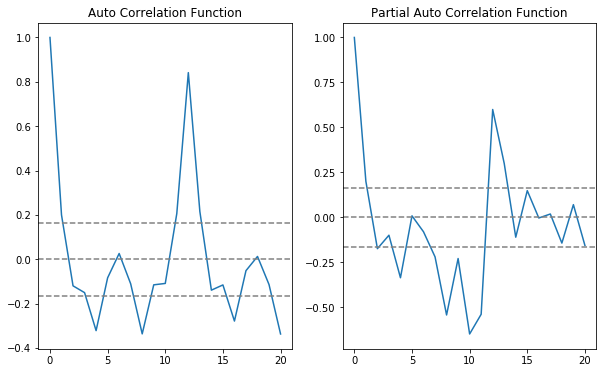

<Figure size 720x432 with 0 Axes>

In [61]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle="--", color = "gray")
plt.axhline(y=-1.96/np.sqrt(len(dlogds)),linestyle="--", color = "gray")
plt.axhline(y=1.96/np.sqrt(len(dlogds)),linestyle="--", color = "gray")
plt.title("Auto Correlation Function")

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle="--", color = "gray")
plt.axhline(y=-1.96/np.sqrt(len(dlogds)),linestyle="--", color = "gray")
plt.axhline(y=1.96/np.sqrt(len(dlogds)),linestyle="--", color = "gray")
plt.title("Partial Auto Correlation Function")
plt.show()
plt.tight_layout()

## ARIMA Model

In [66]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

Plotting AR Model


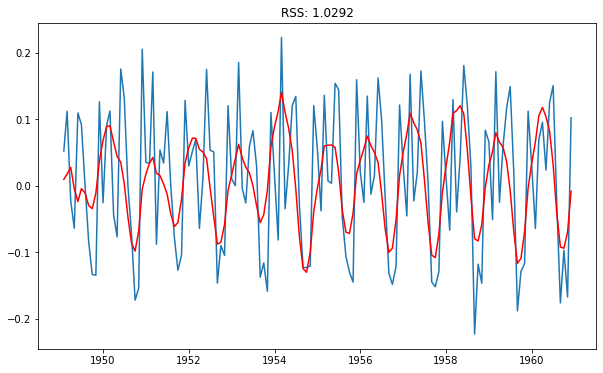

In [67]:
model = ARIMA(idf_logscale, order = (2,1,2))
predict_AR = model.fit(disp=-1)
plt.plot(dlogds)
plt.plot(predict_AR.fittedvalues, color = "red")
plt.title('RSS: %.4f'% sum((predict_AR.fittedvalues-dlogds["#Passengers"])**2))
print('Plotting AR Model')

## MA Model

Plotting MA Model


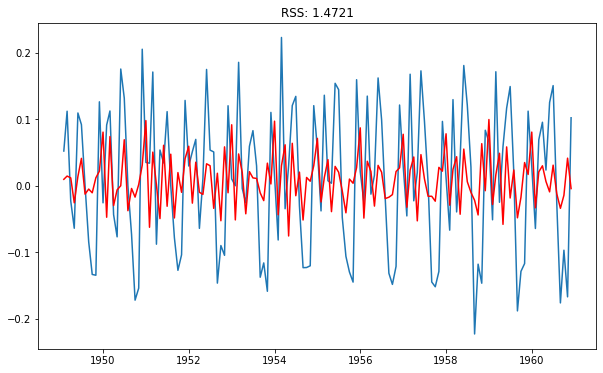

In [92]:
model = ARIMA(idf_logscale, order = (0,1,2))
predict_MA = model.fit(disp=-1)
plt.plot(dlogds)
plt.plot(predict_MA.fittedvalues, color = "red")
plt.title('RSS: %.4f'% sum((predict_MA.fittedvalues-dlogds["#Passengers"])**2))
print('Plotting MA Model')

## Prediction or Forecasting ARIMA difference

In [69]:
pred = pd.Series(predict_AR.fittedvalues, copy = True)
print(pred.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


#### Convert to cumulative sum

In [71]:
pred_csum = pred.cumsum()
print(pred_csum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [73]:
pred_AR_log = pd.Series(idf_logscale["#Passengers"].ix[0], index = idf_logscale.index)
pred_AR_log = pred_AR_log.add(pred_csum,fill_value=0)
pred_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
dtype: float64

## TO Plot Prediction

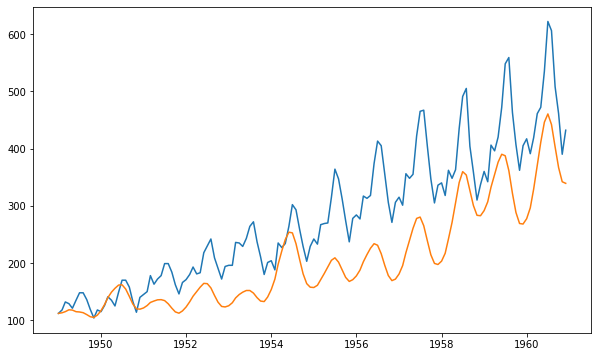

In [74]:
pred_AR = np.exp(pred_AR_log)
plt.plot(idf)
plt.plot(pred_AR)
plt.show()

In [75]:
idf_logscale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


## To forcasting in graphical format

(array([6.09553397, 6.15281411, 6.22442976, 6.29241112, 6.34164725,
        6.36359367, 6.35784689, 6.33139306, 6.29597542, 6.26447717,
        6.24738331, 6.2502518 , 6.27275846, 6.30940322, 6.35151502,
        6.38988663, 6.41727387, 6.43011058, 6.42906693, 6.41842493,
        6.4045616 , 6.39403622, 6.39183091, 6.40019513, 6.41833703,
        6.44295418, 6.46937445, 6.49293994, 6.51024126, 6.5198904 ,
        6.52267585, 6.52112394, 6.51864535, 6.51853699, 6.52311933,
        6.53322372, 6.54812882, 6.56591569, 6.5841032 , 6.6003655 ,
        6.61313276, 6.6219279 , 6.62737797, 6.63093138, 6.63438699,
        6.63937996, 6.64696517, 6.65739854, 6.67015338, 6.68414265,
        6.69806639, 6.71077913, 6.72157744, 6.73033995, 6.73749822,
        6.74386391, 6.75037336, 6.75782606, 6.76668697, 6.77699838,
        6.78841334, 6.80032869, 6.81207209, 6.82308774, 6.8330715 ,
        6.84202506, 6.85022326, 6.85811236, 6.86617355, 6.87479167,
        6.88416319, 6.89426401, 6.90487906, 6.91

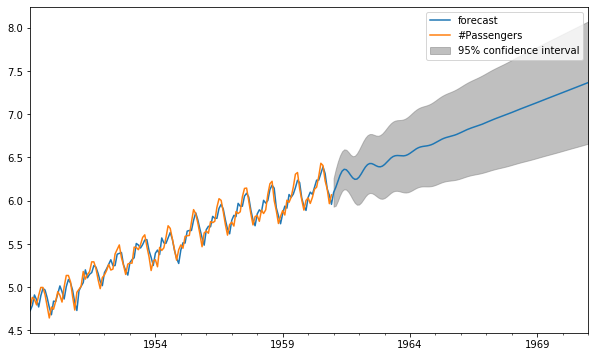

In [83]:
predict_AR.plot_predict(1,264)
predict_AR.forecast(steps = 120)

In [85]:
#x[1]

In [87]:
#len(x[1])

In [89]:
#np.exp(x[1])